In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import pandas as pd
from collections import defaultdict

import sys
sys.path.append('../../scripts')
import bids_utils
from segment_anything import SamPredictor, sam_model_registry

In [5]:
datapath = Path('/home/herman/Documents/NEUROPOLY_21/datasets/data_axondeepseg_tem/')
derivatives_path = Path('../../scripts/derivatives')
embeddings_path = derivatives_path / 'embeddings'
maps_path = derivatives_path / 'maps'

data_dict = bids_utils.index_bids_dataset(datapath)

158 samples collected.


[1534 1668 2056 2267]


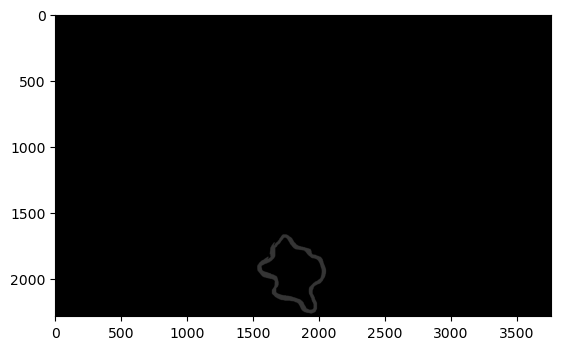

In [41]:
# utility functions to read prompts and labels
%matplotlib inline
def get_sample_bboxes(subject, sample, maps_path):
    prompts_fname = maps_path / subject / 'micr' / f'{subject}_{sample}_prompts.csv'
    prompts_df = pd.read_csv(prompts_fname)
    return prompts_df[['bbox_min_x', 'bbox_min_y', 'bbox_max_x', 'bbox_max_y']]

def get_myelin_bbox(bbox_df, axon_id):
    return np.array(bbox_df.iloc[axon_id])

def get_myelin_map(subject, sample, maps_path):
    map_fname = maps_path / subject / 'micr' / f'{subject}_{sample}_myelinmap.png'
    return cv2.imread(str(map_fname))
    
def get_myelin_mask(myelin_map, axon_id):
    return myelin_map * (myelin_map == axon_id + 1)

bbox_df = get_sample_bboxes('sub-nyuMouse07', 'sample-0007', maps_path)
bbox = get_myelin_bbox(bbox_df, 52)
print(bbox)
mmap = get_myelin_map('sub-nyuMouse07', 'sample-0007', maps_path)
plt.imshow(get_myelin_mask(mmap, 52))

In [7]:
model_type = 'vit_b'
checkpoint = '../../scripts/sam_vit_b_01ec64.pth'
device = 'cpu'#'cuda:2'

sam_model = sam_model_registry[model_type](checkpoint=checkpoint)
sam_model.to(device)
sam_model.train();